In [1]:
import pandas as pd
import math
import time

In [2]:
FORWARD_SELECTION, BACKWARD_ELIMINATION = 'forward_selection', 'backward_elimination'
K_FOLD = 10

In [3]:
def read_dataset(dataset_path):

    data = pd.read_csv(dataset_path, delim_whitespace=True, header = None)
    instance_count, column_count = data.shape   
    feature_count = column_count - 1
    instances = data.values.tolist()
    
    return instances, instance_count, feature_count

In [4]:
def find_euclidean_distance(instance, compare_instance, features):
    
    squares = 0
    for feature in features:
        
        diff = instance[feature] - compare_instance[feature]
        squares += diff ** 2
    
    return math.sqrt(squares)

In [5]:
def find_nearest_neighbor(dataset, feature_set, instance_count):
    
    correct_prediction = 0
    for instance_idx in range(instance_count):
        
        instance = dataset[instance_idx]
        target = instance[0]
        features = feature_set 
        
        nearest_neighbor_distance = math.inf
        nearest_neighbor_predict = -1
        
        for compare_idx in range(instance_count):
            
            if compare_idx != instance_idx:
                
                compare_instance = dataset[compare_idx]
                compare_target = compare_instance[0]
                distance = find_euclidean_distance(instance,
                                                  compare_instance,
                                                  features)
                
                if distance < nearest_neighbor_distance:
                        nearest_neighbor_distance = distance
                        nearest_neighbor_predict = compare_target
         
        if nearest_neighbor_predict == target:
            correct_prediction += 1
        
    return correct_prediction / instance_count

In [6]:
import matplotlib.pyplot as plt

def plot_graph(accuracy_map, search_type, dataset_size):
    
    x = []
    y = []
    for key in sorted(accuracy_map):
        x.append(key)
        y.append(accuracy_map[key])
        
    plt.plot(x, y)
    plt.xlabel('Feature Count')
    plt.ylabel('Accuracy')
    plt.title('' + search_type.upper() + ' Dataset ' + dataset_size)
    plt.show()

In [7]:
def leave_one_out_cross_validation(instances, instance_count, feature_set):
    
    
    fold_size = instance_count//K_FOLD
    accuracy_list = []
    for k_fold_itr in range(1, K_FOLD):
        
        ## dataset
        remove_start = (k_fold_itr - 1) * fold_size
        remove_end = remove_start + fold_size
        
        dataset = instances[0:remove_start] + instances[remove_end: instance_count]
        
        accuracy = find_nearest_neighbor(dataset, feature_set, fold_size)
        accuracy_list.append(accuracy)
    
    return sum(accuracy_list)/K_FOLD

In [8]:
def start_experiment(instances, instance_count, feature_count, search_type = FORWARD_SELECTION):
    
    print()
    print()
    print(search_type.upper())
    accuracy_map = {}
    
    all_feature_set = list(range(1, feature_count + 1))
    accuracy = leave_one_out_cross_validation(\
                    instances, instance_count, all_feature_set)
    print('Running nearest neighbor with all', feature_count, 'features, using leave-one-out evaluation',
         'with accuracy', '{:0.1f}%'.format(accuracy * 100))
    accuracy_map[len(all_feature_set)] = accuracy
    
    if search_type == FORWARD_SELECTION:
        current_feature_set = []
    elif search_type == BACKWARD_ELIMINATION:
        current_feature_set = all_feature_set
    
    print()
    print('Beginning Search ')
    best_accuracy_feature_set = all_feature_set
    best_accuracy = accuracy
    for level in range(1, feature_count):
        
        print('On the ', str(level), 'th level of the search tree')
        level_wise_best_accuracy_feature_set = None
        level_wise_best_accuracy_feature = None
        level_wise_best_accuracy = 0
        
        for feature in range(1, feature_count + 1):
            
            if (feature not in current_feature_set and search_type == FORWARD_SELECTION) or \
                (feature in current_feature_set and search_type == BACKWARD_ELIMINATION):
                
                if search_type == FORWARD_SELECTION:
                    feature_set = current_feature_set + [feature]
                elif search_type == BACKWARD_ELIMINATION:
                    feature_set = list(set(current_feature_set) - set([feature]))
                    
                accuracy = leave_one_out_cross_validation(\
                                instances, instance_count, \
                                feature_set)
                
                feature_set.sort()
                feature_set_string = '{' + ','.join(str(f) for f in feature_set) + '}'
                print('\t Using features',  feature_set_string, 'accuracy is', '{:0.1f}%'.format(accuracy * 100) )
                
                if accuracy > level_wise_best_accuracy:
                    level_wise_best_accuracy = accuracy
                    level_wise_best_accuracy_feature = feature
                    level_wise_best_accuracy_feature_set = feature_set
                    
        if search_type == FORWARD_SELECTION:
            current_feature_set.append(level_wise_best_accuracy_feature)
            add_remove_log = 'adding ' + 'feature ' + str(level_wise_best_accuracy_feature)
        elif search_type == BACKWARD_ELIMINATION:
            current_feature_set = list(set(current_feature_set) - set([level_wise_best_accuracy_feature]))
            add_remove_log = 'removing ' + 'feature ' + str(level_wise_best_accuracy_feature)
            
        
        level_wise_best_feature_set_string = '{' + ','.join(str(f) for f in level_wise_best_accuracy_feature_set) + '}'
        print('Feature set ', level_wise_best_feature_set_string, \
              ' was best. accuracy is', '{:0.1f}%'.format(level_wise_best_accuracy*100), add_remove_log )
        
        accuracy_map[len(level_wise_best_accuracy_feature_set)] = level_wise_best_accuracy
        print()
        
        if level_wise_best_accuracy > best_accuracy:
            best_accuracy = level_wise_best_accuracy
            best_accuracy_feature_set = level_wise_best_accuracy_feature_set
    
    best_accuracy_feature_set_string = '{' + ','.join(str(f) for f in best_accuracy_feature_set) + '}'
    print('Finished search !!', 'The best feature subset is', best_accuracy_feature_set_string, \
             'which has an accuracy of', '{:0.1f}%'.format(best_accuracy*100) )
    
    return accuracy_map
    

Press 11 to run Forward Selection with small dataset
Press 12 to run Forward Selection with large dataset
Press 21 to run Backward Elimination with small dataset
Press 22 to run Backward Elimination with large dataset
Press any other key to exit
11
Forward Selection selected with small dataset


FORWARD_SELECTION
Running nearest neighbor with all 10 features, using leave-one-out evaluation with accuracy 65.3%

Beginning Search 
On the  1 th level of the search tree
	 Using features {1} accuracy is 71.3%
	 Using features {2} accuracy is 70.3%
	 Using features {3} accuracy is 71.7%
	 Using features {4} accuracy is 68.0%
	 Using features {5} accuracy is 65.0%
	 Using features {6} accuracy is 65.0%
	 Using features {7} accuracy is 65.0%
	 Using features {8} accuracy is 75.0%
	 Using features {9} accuracy is 68.3%
	 Using features {10} accuracy is 73.3%
Feature set  {8}  was best. accuracy is 75.0% adding feature 8

On the  2 th level of the search tree
	 Using features {1,8} accuracy is 75

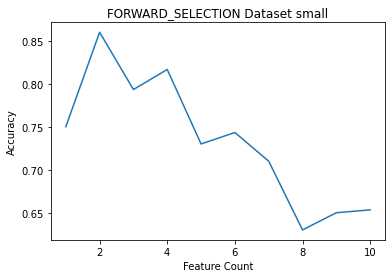

Execution time  0.8 seconds


Press 11 to run Forward Selection with small dataset
Press 12 to run Forward Selection with large dataset
Press 21 to run Backward Elimination with small dataset
Press 22 to run Backward Elimination with large dataset
Press any other key to exit
21
Backward Elimination selected with small dataset


BACKWARD_ELIMINATION
Running nearest neighbor with all 10 features, using leave-one-out evaluation with accuracy 65.3%

Beginning Search 
On the  1 th level of the search tree
	 Using features {2,3,4,5,6,7,8,9,10} accuracy is 65.0%
	 Using features {1,3,4,5,6,7,8,9,10} accuracy is 63.0%
	 Using features {1,2,4,5,6,7,8,9,10} accuracy is 65.7%
	 Using features {1,2,3,5,6,7,8,9,10} accuracy is 69.0%
	 Using features {1,2,3,4,6,7,8,9,10} accuracy is 65.7%
	 Using features {1,2,3,4,5,7,8,9,10} accuracy is 63.7%
	 Using features {1,2,3,4,5,6,8,9,10} accuracy is 63.3%
	 Using features {1,2,3,4,5,6,7,9,10} accuracy is 64.0%
	 Using features {1,2,3,4,5,6,7,8,10} accuracy

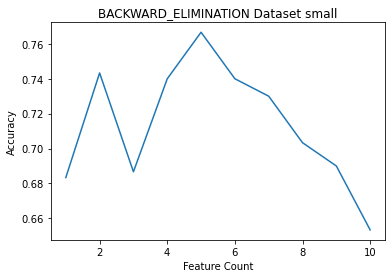

Execution time  1.5 seconds


Press 11 to run Forward Selection with small dataset
Press 12 to run Forward Selection with large dataset
Press 21 to run Backward Elimination with small dataset
Press 22 to run Backward Elimination with large dataset
Press any other key to exit
12
Forward Selection selected with large dataset


FORWARD_SELECTION
Running nearest neighbor with all 40 features, using leave-one-out evaluation with accuracy 66.2%

Beginning Search 
On the  1 th level of the search tree
	 Using features {1} accuracy is 70.4%
	 Using features {2} accuracy is 71.4%
	 Using features {3} accuracy is 70.7%
	 Using features {4} accuracy is 81.8%
	 Using features {5} accuracy is 66.1%
	 Using features {6} accuracy is 70.6%
	 Using features {7} accuracy is 69.5%
	 Using features {8} accuracy is 69.4%
	 Using features {9} accuracy is 72.4%
	 Using features {10} accuracy is 76.6%
	 Using features {11} accuracy is 65.5%
	 Using features {12} accuracy is 70.5%
	 Using features {13} accurac

	 Using features {4,16,21,34,37} accuracy is 79.6%
	 Using features {4,17,21,34,37} accuracy is 78.5%
	 Using features {4,18,21,34,37} accuracy is 77.6%
	 Using features {4,19,21,34,37} accuracy is 78.3%
	 Using features {4,20,21,34,37} accuracy is 79.1%
	 Using features {4,21,22,34,37} accuracy is 73.8%
	 Using features {4,21,23,34,37} accuracy is 77.9%
	 Using features {4,21,24,34,37} accuracy is 79.5%
	 Using features {4,21,25,34,37} accuracy is 80.3%
	 Using features {4,21,26,34,37} accuracy is 80.1%
	 Using features {4,21,27,34,37} accuracy is 74.0%
	 Using features {4,21,28,34,37} accuracy is 77.0%
	 Using features {4,21,29,34,37} accuracy is 73.2%
	 Using features {4,21,30,34,37} accuracy is 70.8%
	 Using features {4,21,31,34,37} accuracy is 73.7%
	 Using features {4,21,32,34,37} accuracy is 78.4%
	 Using features {4,21,33,34,37} accuracy is 74.5%
	 Using features {4,21,34,35,37} accuracy is 72.8%
	 Using features {4,21,34,36,37} accuracy is 74.0%
	 Using features {4,21,34,37,38

	 Using features {4,7,17,18,20,21,22,34,37} accuracy is 78.3%
	 Using features {4,7,17,18,20,21,23,34,37} accuracy is 78.8%
	 Using features {4,7,17,18,20,21,24,34,37} accuracy is 81.0%
	 Using features {4,7,17,18,20,21,25,34,37} accuracy is 80.1%
	 Using features {4,7,17,18,20,21,26,34,37} accuracy is 79.8%
	 Using features {4,7,17,18,20,21,27,34,37} accuracy is 78.2%
	 Using features {4,7,17,18,20,21,28,34,37} accuracy is 80.5%
	 Using features {4,7,17,18,20,21,29,34,37} accuracy is 79.0%
	 Using features {4,7,17,18,20,21,30,34,37} accuracy is 73.3%
	 Using features {4,7,17,18,20,21,31,34,37} accuracy is 81.9%
	 Using features {4,7,17,18,20,21,32,34,37} accuracy is 78.3%
	 Using features {4,7,17,18,20,21,33,34,37} accuracy is 78.9%
	 Using features {4,7,17,18,20,21,34,35,37} accuracy is 80.1%
	 Using features {4,7,17,18,20,21,34,36,37} accuracy is 76.8%
	 Using features {4,7,17,18,20,21,34,37,38} accuracy is 78.6%
	 Using features {4,7,17,18,20,21,34,37,39} accuracy is 81.0%
	 Using 

	 Using features {4,7,12,15,17,18,20,21,25,31,34,35,37} accuracy is 73.9%
	 Using features {4,7,13,15,17,18,20,21,25,31,34,35,37} accuracy is 79.1%
	 Using features {4,7,14,15,17,18,20,21,25,31,34,35,37} accuracy is 78.5%
	 Using features {4,7,15,16,17,18,20,21,25,31,34,35,37} accuracy is 78.6%
	 Using features {4,7,15,17,18,19,20,21,25,31,34,35,37} accuracy is 79.7%
	 Using features {4,7,15,17,18,20,21,22,25,31,34,35,37} accuracy is 78.6%
	 Using features {4,7,15,17,18,20,21,23,25,31,34,35,37} accuracy is 74.7%
	 Using features {4,7,15,17,18,20,21,24,25,31,34,35,37} accuracy is 80.2%
	 Using features {4,7,15,17,18,20,21,25,26,31,34,35,37} accuracy is 76.7%
	 Using features {4,7,15,17,18,20,21,25,27,31,34,35,37} accuracy is 73.7%
	 Using features {4,7,15,17,18,20,21,25,28,31,34,35,37} accuracy is 77.4%
	 Using features {4,7,15,17,18,20,21,25,29,31,34,35,37} accuracy is 76.7%
	 Using features {4,7,15,17,18,20,21,25,30,31,34,35,37} accuracy is 73.4%
	 Using features {4,7,15,17,18,20,21,2

	 Using features {1,4,7,13,15,17,18,19,20,21,24,25,29,31,34,35,37} accuracy is 78.2%
	 Using features {2,4,7,13,15,17,18,19,20,21,24,25,29,31,34,35,37} accuracy is 77.3%
	 Using features {3,4,7,13,15,17,18,19,20,21,24,25,29,31,34,35,37} accuracy is 79.2%
	 Using features {4,5,7,13,15,17,18,19,20,21,24,25,29,31,34,35,37} accuracy is 76.8%
	 Using features {4,6,7,13,15,17,18,19,20,21,24,25,29,31,34,35,37} accuracy is 79.3%
	 Using features {4,7,8,13,15,17,18,19,20,21,24,25,29,31,34,35,37} accuracy is 77.3%
	 Using features {4,7,9,13,15,17,18,19,20,21,24,25,29,31,34,35,37} accuracy is 77.0%
	 Using features {4,7,10,13,15,17,18,19,20,21,24,25,29,31,34,35,37} accuracy is 74.5%
	 Using features {4,7,11,13,15,17,18,19,20,21,24,25,29,31,34,35,37} accuracy is 76.7%
	 Using features {4,7,12,13,15,17,18,19,20,21,24,25,29,31,34,35,37} accuracy is 77.1%
	 Using features {4,7,13,14,15,17,18,19,20,21,24,25,29,31,34,35,37} accuracy is 78.4%
	 Using features {4,7,13,15,16,17,18,19,20,21,24,25,29,31,34,

	 Using features {4,7,8,13,15,17,18,19,20,21,24,25,26,29,31,34,35,36,37,39} accuracy is 76.8%
	 Using features {4,7,8,13,15,17,18,19,20,21,24,25,26,29,31,34,35,37,38,39} accuracy is 79.0%
	 Using features {4,7,8,13,15,17,18,19,20,21,24,25,26,29,31,34,35,37,39,40} accuracy is 77.9%
Feature set  {4,7,8,9,13,15,17,18,19,20,21,24,25,26,29,31,34,35,37,39}  was best. accuracy is 80.0% adding feature 9

On the  21 th level of the search tree
	 Using features {1,4,7,8,9,13,15,17,18,19,20,21,24,25,26,29,31,34,35,37,39} accuracy is 77.0%
	 Using features {2,4,7,8,9,13,15,17,18,19,20,21,24,25,26,29,31,34,35,37,39} accuracy is 77.0%
	 Using features {3,4,7,8,9,13,15,17,18,19,20,21,24,25,26,29,31,34,35,37,39} accuracy is 78.3%
	 Using features {4,5,7,8,9,13,15,17,18,19,20,21,24,25,26,29,31,34,35,37,39} accuracy is 80.2%
	 Using features {4,6,7,8,9,13,15,17,18,19,20,21,24,25,26,29,31,34,35,37,39} accuracy is 75.7%
	 Using features {4,7,8,9,10,13,15,17,18,19,20,21,24,25,26,29,31,34,35,37,39} accuracy

	 Using features {1,3,4,5,7,8,9,13,15,17,18,19,20,21,24,25,26,27,29,31,33,34,35,37,39} accuracy is 73.2%
	 Using features {2,3,4,5,7,8,9,13,15,17,18,19,20,21,24,25,26,27,29,31,33,34,35,37,39} accuracy is 72.8%
	 Using features {3,4,5,6,7,8,9,13,15,17,18,19,20,21,24,25,26,27,29,31,33,34,35,37,39} accuracy is 75.2%
	 Using features {3,4,5,7,8,9,10,13,15,17,18,19,20,21,24,25,26,27,29,31,33,34,35,37,39} accuracy is 74.7%
	 Using features {3,4,5,7,8,9,11,13,15,17,18,19,20,21,24,25,26,27,29,31,33,34,35,37,39} accuracy is 76.6%
	 Using features {3,4,5,7,8,9,12,13,15,17,18,19,20,21,24,25,26,27,29,31,33,34,35,37,39} accuracy is 74.8%
	 Using features {3,4,5,7,8,9,13,14,15,17,18,19,20,21,24,25,26,27,29,31,33,34,35,37,39} accuracy is 73.6%
	 Using features {3,4,5,7,8,9,13,15,16,17,18,19,20,21,24,25,26,27,29,31,33,34,35,37,39} accuracy is 78.0%
	 Using features {3,4,5,7,8,9,13,15,17,18,19,20,21,22,24,25,26,27,29,31,33,34,35,37,39} accuracy is 77.7%
	 Using features {3,4,5,7,8,9,13,15,17,18,19,20,2

	 Using features {3,4,5,7,8,9,13,15,16,17,18,19,20,21,22,24,25,26,27,29,31,32,33,34,35,36,37,38,39} accuracy is 73.0%
	 Using features {3,4,5,7,8,9,13,15,16,17,18,19,20,21,22,24,25,26,27,29,31,32,33,34,35,36,37,39,40} accuracy is 74.1%
Feature set  {3,4,5,7,8,9,12,13,15,16,17,18,19,20,21,22,24,25,26,27,29,31,32,33,34,35,36,37,39}  was best. accuracy is 77.9% adding feature 12

On the  30 th level of the search tree
	 Using features {1,3,4,5,7,8,9,12,13,15,16,17,18,19,20,21,22,24,25,26,27,29,31,32,33,34,35,36,37,39} accuracy is 72.1%
	 Using features {2,3,4,5,7,8,9,12,13,15,16,17,18,19,20,21,22,24,25,26,27,29,31,32,33,34,35,36,37,39} accuracy is 76.5%
	 Using features {3,4,5,6,7,8,9,12,13,15,16,17,18,19,20,21,22,24,25,26,27,29,31,32,33,34,35,36,37,39} accuracy is 74.8%
	 Using features {3,4,5,7,8,9,10,12,13,15,16,17,18,19,20,21,22,24,25,26,27,29,31,32,33,34,35,36,37,39} accuracy is 74.8%
	 Using features {3,4,5,7,8,9,11,12,13,15,16,17,18,19,20,21,22,24,25,26,27,29,31,32,33,34,35,36,37,3

	 Using features {2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,29,30,31,32,33,34,35,36,37,39,40} accuracy is 70.8%
	 Using features {2,3,4,5,7,8,9,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,39,40} accuracy is 67.6%
	 Using features {2,3,4,5,7,8,9,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,29,30,31,32,33,34,35,36,37,38,39,40} accuracy is 67.8%
Feature set  {1,2,3,4,5,7,8,9,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,29,30,31,32,33,34,35,36,37,39,40}  was best. accuracy is 72.9% adding feature 1

On the  37 th level of the search tree
	 Using features {1,2,3,4,5,6,7,8,9,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,29,30,31,32,33,34,35,36,37,39,40} accuracy is 70.2%
	 Using features {1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,29,30,31,32,33,34,35,36,37,39,40} accuracy is 72.1%
	 Using features {1,2,3,4,5,7,8,9,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,

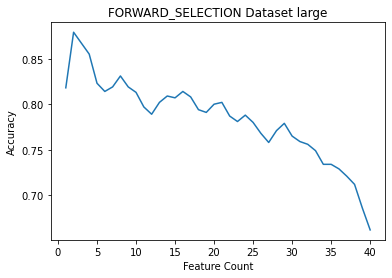

Execution time  218.7 seconds


Press 11 to run Forward Selection with small dataset
Press 12 to run Forward Selection with large dataset
Press 21 to run Backward Elimination with small dataset
Press 22 to run Backward Elimination with large dataset
Press any other key to exit
22
Backward Elimination selected with large dataset


BACKWARD_ELIMINATION
Running nearest neighbor with all 40 features, using leave-one-out evaluation with accuracy 66.2%

Beginning Search 
On the  1 th level of the search tree
	 Using features {2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40} accuracy is 67.0%
	 Using features {1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40} accuracy is 63.9%
	 Using features {1,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40} accuracy is 65.1%
	 Using features {1,2,3,5,6,7,8,9,10,11,12,13,14,15,16

	 Using features {1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,38,39,40} accuracy is 68.0%
	 Using features {1,2,3,4,5,6,7,8,9,10,11,12,13,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,38,39,40} accuracy is 70.1%
	 Using features {1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,38,39,40} accuracy is 70.5%
	 Using features {1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,38,39,40} accuracy is 66.2%
	 Using features {1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,38,39,40} accuracy is 63.6%
	 Using features {1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,38,39,40} accuracy is 67.7%
	 Using features {1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,38,39,40} accuracy is 69.1%
	 Usin

	 Using features {1,2,3,4,5,6,7,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,33,34,35,36,38,39,40} accuracy is 67.6%
	 Using features {1,2,3,4,5,6,7,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,35,36,38,39,40} accuracy is 69.2%
	 Using features {1,2,3,4,5,6,7,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,35,36,38,39,40} accuracy is 64.8%
	 Using features {1,2,3,4,5,6,7,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,36,38,39,40} accuracy is 65.8%
	 Using features {1,2,3,4,5,6,7,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,38,39,40} accuracy is 64.6%
	 Using features {1,2,3,4,5,6,7,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,39,40} accuracy is 71.1%
	 Using features {1,2,3,4,5,6,7,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,38,40} accuracy is 70.4%
	 Using features {1,

	 Using features {1,2,3,4,6,9,10,11,12,13,14,15,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,38,39,40} accuracy is 70.5%
	 Using features {1,2,3,4,6,9,10,11,12,13,14,15,16,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,38,39,40} accuracy is 63.9%
	 Using features {1,2,3,4,6,9,10,11,12,13,14,15,16,17,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,38,39,40} accuracy is 71.3%
	 Using features {1,2,3,4,6,9,10,11,12,13,14,15,16,17,18,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,38,39,40} accuracy is 72.1%
	 Using features {1,2,3,4,6,9,10,11,12,13,14,15,16,17,18,19,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,38,39,40} accuracy is 69.9%
	 Using features {1,2,3,4,6,9,10,11,12,13,14,15,16,17,18,19,20,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,38,39,40} accuracy is 69.9%
	 Using features {1,2,3,4,6,9,10,11,12,13,14,15,16,17,18,19,20,21,23,24,25,26,27,28,29,30,31,32,33,34,35,36,38,39,40} accuracy is 71.4%
	 Using features {1,2,3,4,6,9,10,11,12,13,14,15,

	 Using features {2,3,4,6,9,10,11,12,13,14,15,16,17,18,19,20,22,23,24,25,26,27,29,30,31,32,33,34,35,36,38,39,40} accuracy is 73.5%
	 Using features {1,3,4,6,9,10,11,12,13,14,15,16,17,18,19,20,22,23,24,25,26,27,29,30,31,32,33,34,35,36,38,39,40} accuracy is 71.2%
	 Using features {1,2,4,6,9,10,11,12,13,14,15,16,17,18,19,20,22,23,24,25,26,27,29,30,31,32,33,34,35,36,38,39,40} accuracy is 69.7%
	 Using features {1,2,3,6,9,10,11,12,13,14,15,16,17,18,19,20,22,23,24,25,26,27,29,30,31,32,33,34,35,36,38,39,40} accuracy is 73.5%
	 Using features {1,2,3,4,9,10,11,12,13,14,15,16,17,18,19,20,22,23,24,25,26,27,29,30,31,32,33,34,35,36,38,39,40} accuracy is 72.2%
	 Using features {1,2,3,4,6,10,11,12,13,14,15,16,17,18,19,20,22,23,24,25,26,27,29,30,31,32,33,34,35,36,38,39,40} accuracy is 69.8%
	 Using features {1,2,3,4,6,9,11,12,13,14,15,16,17,18,19,20,22,23,24,25,26,27,29,30,31,32,33,34,35,36,38,39,40} accuracy is 72.3%
	 Using features {1,2,3,4,6,9,10,12,13,14,15,16,17,18,19,20,22,23,24,25,26,27,29,30,

	 Using features {1,2,3,4,6,9,10,11,12,13,14,15,16,17,18,19,20,22,23,24,25,26,27,29,31,32,33,34,35,38,39,40} accuracy is 72.0%
	 Using features {1,2,3,4,6,9,10,11,12,13,14,15,16,17,18,19,20,22,23,24,25,26,27,29,31,32,33,34,35,36,39,40} accuracy is 72.1%
	 Using features {1,2,3,4,6,9,10,11,12,13,14,15,16,17,18,19,20,22,23,24,25,26,27,29,31,32,33,34,35,36,38,40} accuracy is 73.2%
	 Using features {1,2,3,4,6,9,10,11,12,13,14,15,16,17,18,19,20,22,23,24,25,26,27,29,31,32,33,34,35,36,38,39} accuracy is 73.4%
Feature set  {1,2,3,4,9,10,11,12,13,14,15,16,17,18,19,20,22,23,24,25,26,27,29,31,32,33,34,35,36,38,39,40}  was best. accuracy is 74.4% removing feature 6

On the  9 th level of the search tree
	 Using features {2,3,4,9,10,11,12,13,14,15,16,17,18,19,20,22,23,24,25,26,27,29,31,32,33,34,35,36,38,39,40} accuracy is 71.8%
	 Using features {1,3,4,9,10,11,12,13,14,15,16,17,18,19,20,22,23,24,25,26,27,29,31,32,33,34,35,36,38,39,40} accuracy is 73.6%
	 Using features {1,2,4,9,10,11,12,13,14,15,16,

	 Using features {1,2,3,4,9,10,11,12,13,14,15,16,17,18,19,22,23,24,25,26,27,29,31,32,33,34,35,38,39,40} accuracy is 74.9%
	 Using features {1,2,3,4,9,10,11,12,13,14,15,16,17,18,19,22,23,24,25,26,27,29,31,32,33,34,35,36,39,40} accuracy is 75.3%
	 Using features {1,2,3,4,9,10,11,12,13,14,15,16,17,18,19,22,23,24,25,26,27,29,31,32,33,34,35,36,38,40} accuracy is 70.9%
	 Using features {1,2,3,4,9,10,11,12,13,14,15,16,17,18,19,22,23,24,25,26,27,29,31,32,33,34,35,36,38,39} accuracy is 73.3%
Feature set  {1,2,3,4,9,10,11,12,13,14,15,16,17,18,19,22,23,24,26,27,29,31,32,33,34,35,36,38,39,40}  was best. accuracy is 75.9% removing feature 25

On the  11 th level of the search tree
	 Using features {2,3,4,9,10,11,12,13,14,15,16,17,18,19,22,23,24,26,27,29,31,32,33,34,35,36,38,39,40} accuracy is 74.0%
	 Using features {1,3,4,9,10,11,12,13,14,15,16,17,18,19,22,23,24,26,27,29,31,32,33,34,35,36,38,39,40} accuracy is 74.8%
	 Using features {1,2,4,9,10,11,12,13,14,15,16,17,18,19,22,23,24,26,27,29,31,32,33,

	 Using features {1,2,4,9,10,11,12,13,14,16,17,18,19,22,24,26,27,29,31,32,33,34,35,36,38,39,40} accuracy is 73.3%
	 Using features {1,2,3,9,10,11,12,13,14,16,17,18,19,22,24,26,27,29,31,32,33,34,35,36,38,39,40} accuracy is 76.0%
	 Using features {1,2,3,4,10,11,12,13,14,16,17,18,19,22,24,26,27,29,31,32,33,34,35,36,38,39,40} accuracy is 75.3%
	 Using features {1,2,3,4,9,11,12,13,14,16,17,18,19,22,24,26,27,29,31,32,33,34,35,36,38,39,40} accuracy is 71.6%
	 Using features {1,2,3,4,9,10,12,13,14,16,17,18,19,22,24,26,27,29,31,32,33,34,35,36,38,39,40} accuracy is 76.7%
	 Using features {1,2,3,4,9,10,11,13,14,16,17,18,19,22,24,26,27,29,31,32,33,34,35,36,38,39,40} accuracy is 74.7%
	 Using features {1,2,3,4,9,10,11,12,14,16,17,18,19,22,24,26,27,29,31,32,33,34,35,36,38,39,40} accuracy is 76.6%
	 Using features {1,2,3,4,9,10,11,12,13,16,17,18,19,22,24,26,27,29,31,32,33,34,35,36,38,39,40} accuracy is 75.9%
	 Using features {1,2,3,4,9,10,11,12,13,14,17,18,19,22,24,26,27,29,31,32,33,34,35,36,38,39,40

	 Using features {1,2,3,4,9,10,11,12,13,14,16,17,18,19,22,24,26,27,33,34,35,36,38,39,40} accuracy is 76.2%
	 Using features {1,2,3,4,9,10,11,12,13,14,16,17,18,19,22,24,26,27,32,34,35,36,38,39,40} accuracy is 75.6%
	 Using features {1,2,3,4,9,10,11,12,13,14,16,17,18,19,22,24,26,27,32,33,35,36,38,39,40} accuracy is 74.3%
	 Using features {1,2,3,4,9,10,11,12,13,14,16,17,18,19,22,24,26,27,32,33,34,36,38,39,40} accuracy is 79.5%
	 Using features {1,2,3,4,9,10,11,12,13,14,16,17,18,19,22,24,26,27,32,33,34,35,38,39,40} accuracy is 75.3%
	 Using features {1,2,3,4,9,10,11,12,13,14,16,17,18,19,22,24,26,27,32,33,34,35,36,39,40} accuracy is 77.0%
	 Using features {1,2,3,4,9,10,11,12,13,14,16,17,18,19,22,24,26,27,32,33,34,35,36,38,40} accuracy is 77.6%
	 Using features {1,2,3,4,9,10,11,12,13,14,16,17,18,19,22,24,26,27,32,33,34,35,36,38,39} accuracy is 77.6%
Feature set  {1,2,3,4,9,10,11,12,13,14,16,17,18,19,22,24,26,27,32,33,34,36,38,39,40}  was best. accuracy is 79.5% removing feature 35

On the  1

	 Using features {1,2,3,4,9,10,11,12,13,14,16,17,18,19,24,26,27,32,33,36,38,39} accuracy is 76.1%
	 Using features {1,2,3,4,9,10,11,12,13,14,16,17,18,19,24,26,27,32,33,34,38,39} accuracy is 75.0%
	 Using features {1,2,3,4,9,10,11,12,13,14,16,17,18,19,24,26,27,32,33,34,36,39} accuracy is 77.3%
	 Using features {1,2,3,4,9,10,11,12,13,14,16,17,18,19,24,26,27,32,33,34,36,38} accuracy is 76.0%
Feature set  {2,3,4,9,10,11,12,13,14,16,17,18,19,24,26,27,32,33,34,36,38,39}  was best. accuracy is 79.0% removing feature 1

On the  19 th level of the search tree
	 Using features {3,4,9,10,11,12,13,14,16,17,18,19,24,26,27,32,33,34,36,38,39} accuracy is 76.6%
	 Using features {2,4,9,10,11,12,13,14,16,17,18,19,24,26,27,32,33,34,36,38,39} accuracy is 75.2%
	 Using features {2,3,9,10,11,12,13,14,16,17,18,19,24,26,27,32,33,34,36,38,39} accuracy is 77.2%
	 Using features {2,3,4,10,11,12,13,14,16,17,18,19,24,26,27,32,33,34,36,38,39} accuracy is 76.2%
	 Using features {2,3,4,9,11,12,13,14,16,17,18,19,24,26

	 Using features {2,3,4,9,10,12,13,14,16,17,24,26,27,32,33,36,38,39} accuracy is 77.3%
	 Using features {2,3,4,9,10,12,13,14,16,17,24,26,27,32,33,34,38,39} accuracy is 77.5%
	 Using features {2,3,4,9,10,12,13,14,16,17,24,26,27,32,33,34,36,39} accuracy is 77.7%
	 Using features {2,3,4,9,10,12,13,14,16,17,24,26,27,32,33,34,36,38} accuracy is 75.9%
Feature set  {2,3,9,10,12,13,14,16,17,24,26,27,32,33,34,36,38,39}  was best. accuracy is 78.5% removing feature 4

On the  23 th level of the search tree
	 Using features {3,9,10,12,13,14,16,17,24,26,27,32,33,34,36,38,39} accuracy is 76.8%
	 Using features {2,9,10,12,13,14,16,17,24,26,27,32,33,34,36,38,39} accuracy is 75.7%
	 Using features {2,3,10,12,13,14,16,17,24,26,27,32,33,34,36,38,39} accuracy is 75.9%
	 Using features {2,3,9,12,13,14,16,17,24,26,27,32,33,34,36,38,39} accuracy is 74.4%
	 Using features {2,3,9,10,13,14,16,17,24,26,27,32,33,34,36,38,39} accuracy is 75.2%
	 Using features {2,3,9,10,12,14,16,17,24,26,27,32,33,34,36,38,39} acc

	 Using features {2,9,10,12,14,17,24,26,27,33,34,38} accuracy is 74.6%
	 Using features {2,9,10,12,14,17,24,26,27,32,34,38} accuracy is 73.2%
	 Using features {2,9,10,12,14,17,24,26,27,32,33,38} accuracy is 72.1%
	 Using features {2,9,10,12,14,17,24,26,27,32,33,34} accuracy is 74.8%
Feature set  {2,9,10,14,17,24,26,27,32,33,34,38}  was best. accuracy is 75.4% removing feature 12

On the  29 th level of the search tree
	 Using features {9,10,14,17,24,26,27,32,33,34,38} accuracy is 73.1%
	 Using features {2,10,14,17,24,26,27,32,33,34,38} accuracy is 72.5%
	 Using features {2,9,14,17,24,26,27,32,33,34,38} accuracy is 71.2%
	 Using features {2,9,10,17,24,26,27,32,33,34,38} accuracy is 68.9%
	 Using features {2,9,10,14,24,26,27,32,33,34,38} accuracy is 73.2%
	 Using features {2,9,10,14,17,26,27,32,33,34,38} accuracy is 74.4%
	 Using features {2,9,10,14,17,24,27,32,33,34,38} accuracy is 73.7%
	 Using features {2,9,10,14,17,24,26,32,33,34,38} accuracy is 74.0%
	 Using features {2,9,10,14,17,2

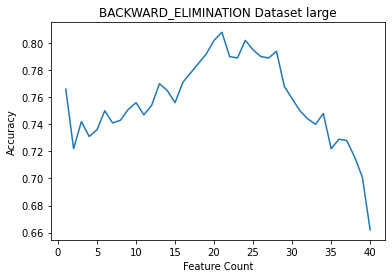

Execution time  387.2 seconds


Press 11 to run Forward Selection with small dataset
Press 12 to run Forward Selection with large dataset
Press 21 to run Backward Elimination with small dataset
Press 22 to run Backward Elimination with large dataset
Press any other key to exit
exit
Exit. Thank you


In [9]:
# driver function
if __name__ == "__main__":
    
    small_dataset_path = 'CS205_SP_2022_SMALLtestdata__35.txt'
    large_dataset_path = 'CS205_SP_2022_Largetestdata__62.txt'
    
    while True:

        input_case = input('Press 11 to run Forward Selection with small dataset\n' + \
                          'Press 12 to run Forward Selection with large dataset\n' + \
                          'Press 21 to run Backward Elimination with small dataset\n' + \
                          'Press 22 to run Backward Elimination with large dataset\n' + \
                          'Press any other key to exit\n').strip()
        
        start_time = time.time()
        
        if input_case == '11':
            print("Forward Selection selected with small dataset")
            instances, instance_count, feature_count = read_dataset(small_dataset_path)
            
            accuracy_map = start_experiment(instances, instance_count, feature_count, FORWARD_SELECTION)
            plot_graph(accuracy_map, FORWARD_SELECTION, 'small')
                
        elif input_case == '12':
            print("Forward Selection selected with large dataset")
            instances, instance_count, feature_count = read_dataset(large_dataset_path)
            
            accuracy_map = start_experiment(instances, instance_count, feature_count, FORWARD_SELECTION)
            plot_graph(accuracy_map, FORWARD_SELECTION, 'large')
            
            
        elif input_case == '21':
            print('Backward Elimination selected with small dataset')
            instances, instance_count, feature_count = read_dataset(small_dataset_path)
            
            accuracy_map = start_experiment(instances, instance_count, feature_count, BACKWARD_ELIMINATION)
            plot_graph(accuracy_map, BACKWARD_ELIMINATION, 'small')
            
            
        elif input_case == '22':
            print('Backward Elimination selected with large dataset')
            
            instances, instance_count, feature_count = read_dataset(large_dataset_path)
            
            accuracy_map = start_experiment(instances, instance_count, feature_count, BACKWARD_ELIMINATION)
            plot_graph(accuracy_map, BACKWARD_ELIMINATION, 'large')
            
            
        else:
            print('Exit. Thank you')
            break
        
        end_time = time.time()
        execution_time_in_seconds = end_time - start_time
        print('Execution time ', '{:0.1f} seconds'.format(execution_time_in_seconds))
        
        print()
        print()